# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [239]:
# Load pickled data
import pickle
import csv
import pandas as pd

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

labelnames = pd.read_csv('signnames.csv').values[:,1]

print(labelnames)

['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road' 'Slippery road'
 'Road narrows on the right' 'Road work' 'Traffic signals' 'Pedestrians'
 'Children crossing' 'Bicycles crossing' 'Beware of ice/snow'
 'Wild animals crossing' 'End of all speed and passing limits'
 'Turn right ahead' 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' 'Keep left' 'Roundabout mandatory'
 'End of no passing' 'End of no passing by vehicles over 3.5 metric tons']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [116]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_valid))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

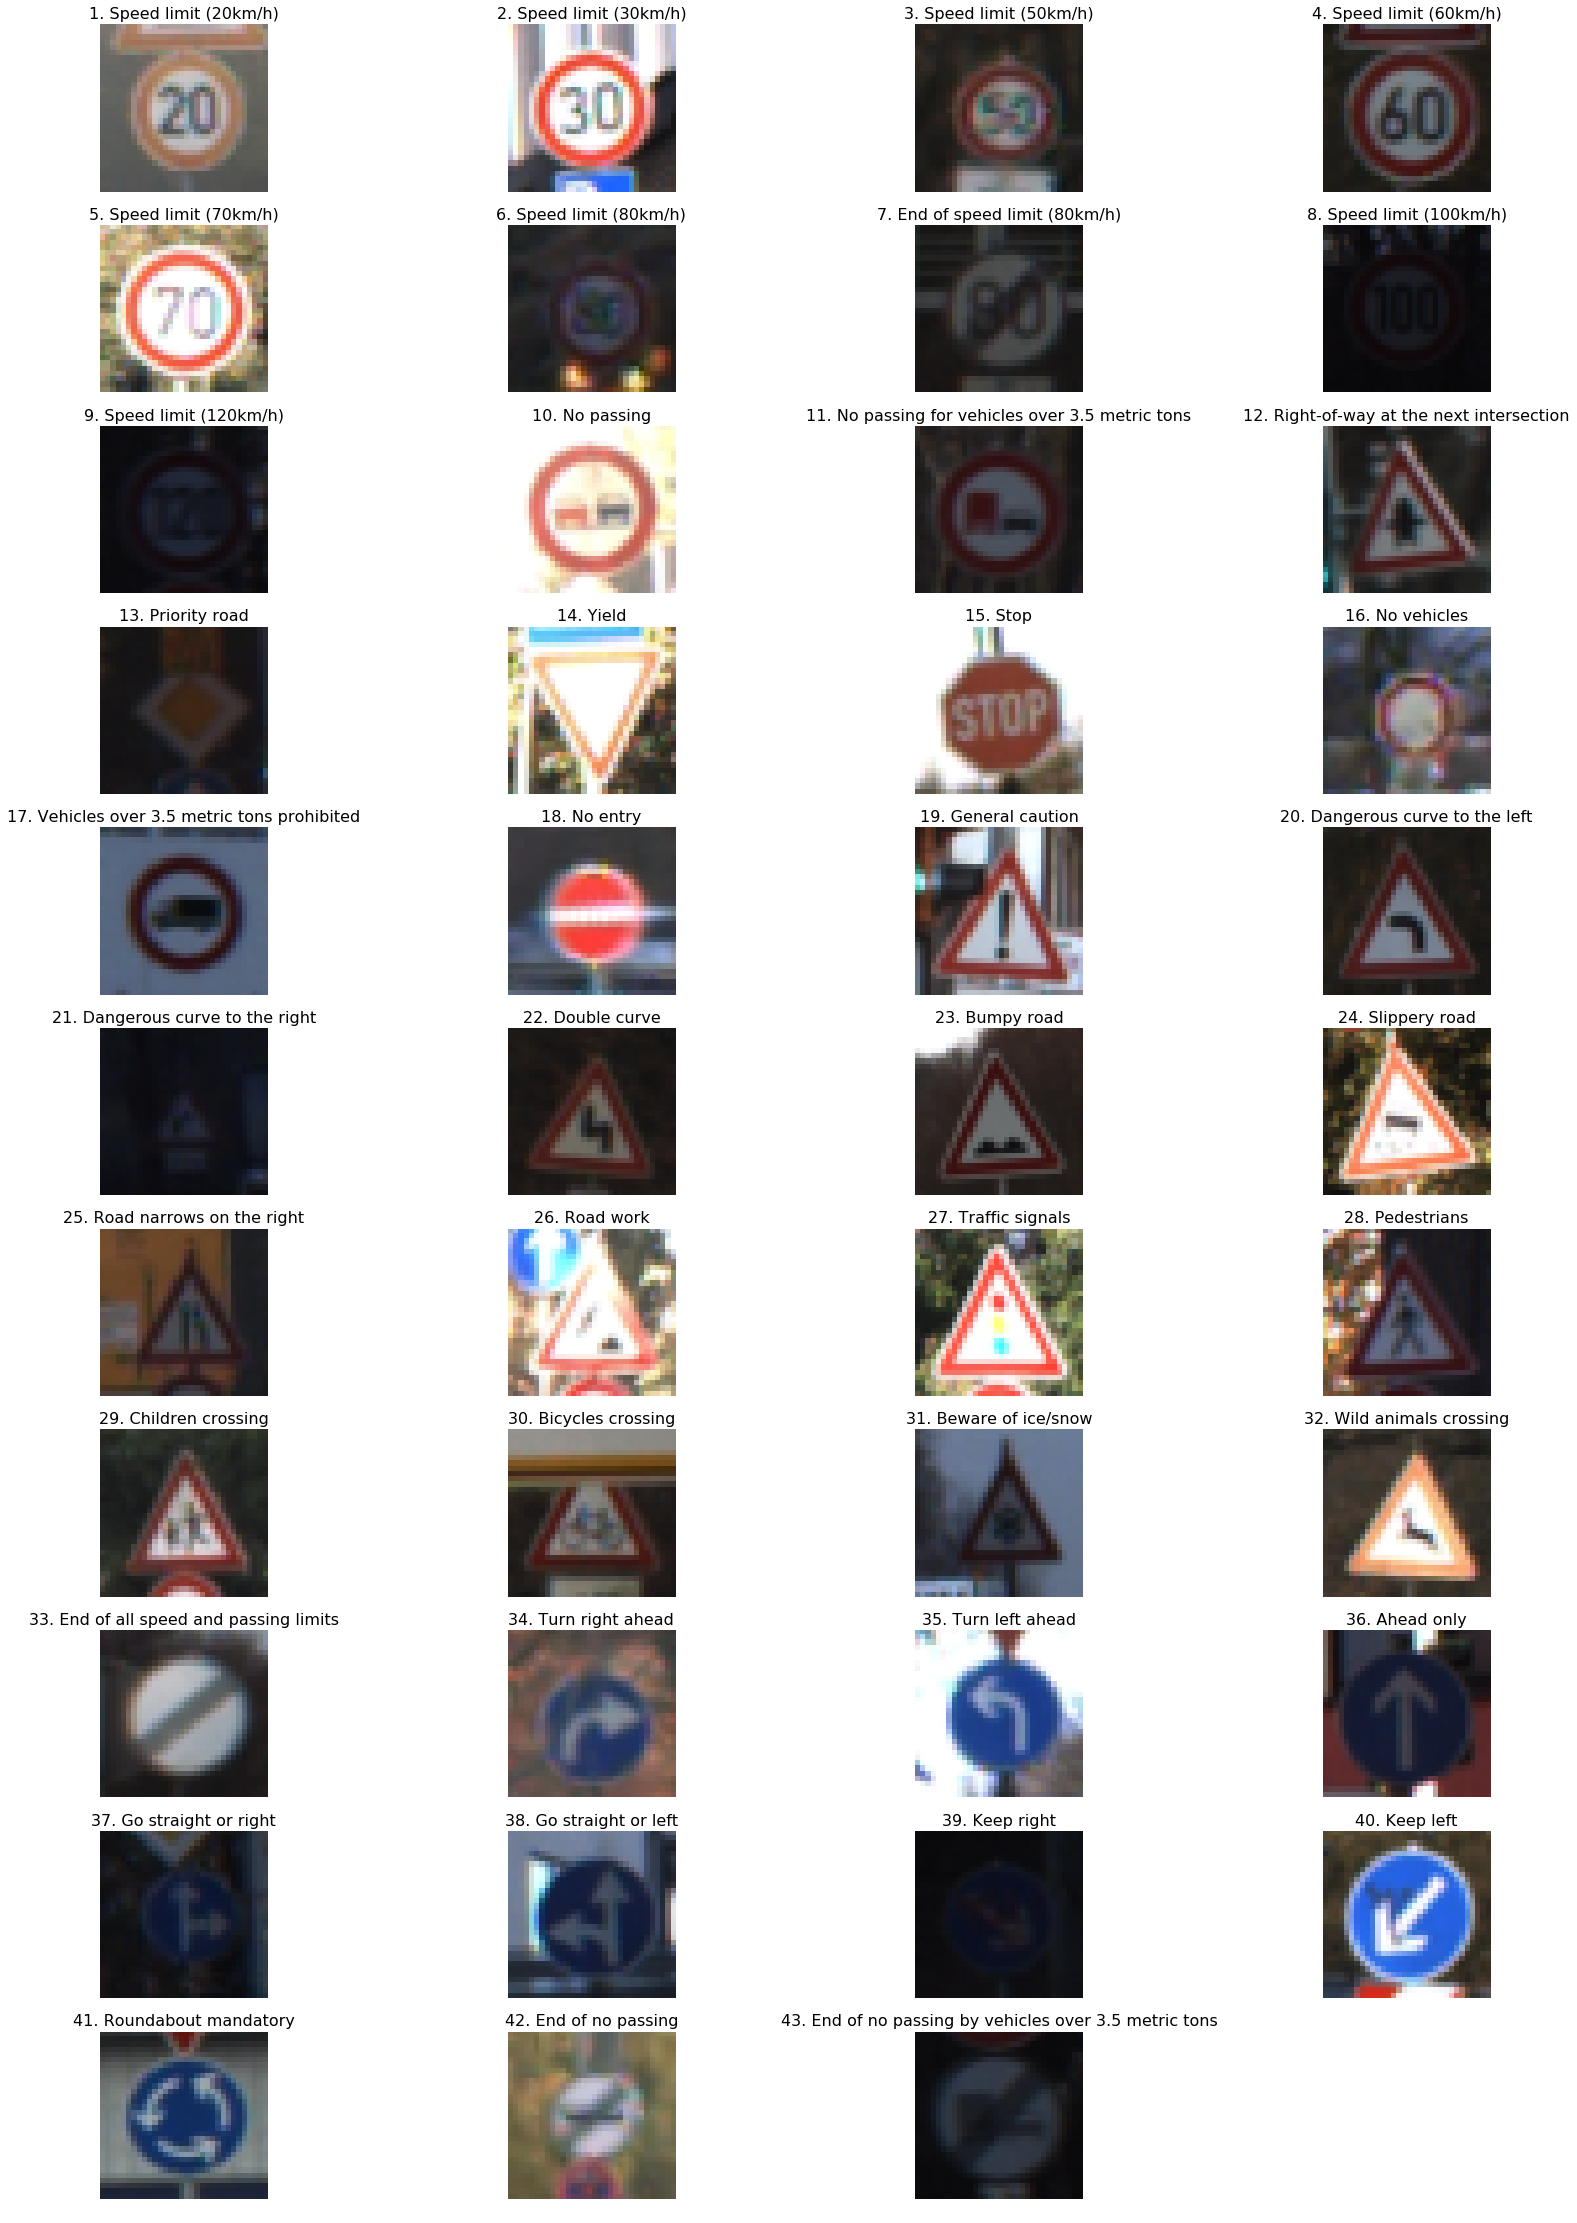

In [24]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.figure(figsize=(28, 40))
for i in range(n_classes): 
    for j in range(n_train): 
        if y_train[j]==i: 
            index = j 
            image = X_train[index] 
            plt.subplot(11,4,i+1) 
            plt.imshow(image, cmap="gray") 
            plt.axis('off') 
            plt.title("{}. {}".format(i+1,labelnames[i]), fontsize=16) 
            break

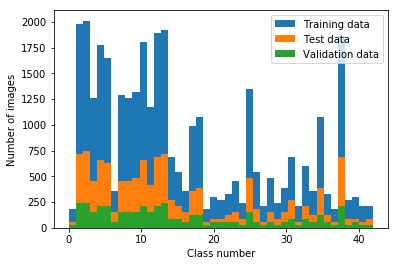

In [118]:
# Making a histogram for the distribution

#Trainning data
plt.hist(y_train, n_classes)
#Test data
plt.hist(y_test, n_classes)
#Validation data
plt.hist(y_valid, n_classes)
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.legend(['Training data','Test data', 'Validation data'])

**Note**: The cases in classes are not evenly distributed. Some classes have more cases than other classes. This may have effect on the final result.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [241]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
# RGB to Grayscale
def grayscale(data):
    """Applies the Grayscale transform
    This will return an image with only one color channel"""
    gray_img=[]
    for img in data:
        gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_img.append(gray)
    gray_img=np.array(gray_img)
    return gray_img[...,None]

# Normalize the data to the range from 0 to 1
def normalize(x):
    return (x-128)/128

#print("Gray scale Image data shape =", X_train_gray.shape)

In [242]:
from sklearn.utils import shuffle
# Shuffle the data
X_train, y_train = shuffle(X_train, y_train)

# Grayscale
X_train_gray = grayscale(X_train)
X_test_gray = grayscale(X_test)
X_valid_gray = grayscale(X_valid)
#print("Original Image data shape =",X_train.shape)
#print("Gray scale Image data shape =",X_train_gray.shape)

# Normalize
X_train_nor=normalize(X_train_gray)
X_test_nor=normalize(X_test_gray)
X_valid_nor=normalize(X_valid_gray)

print("Original training data mean =",np.mean(X_train_gray))
print("Original test data mean =",np.mean(X_test_gray))
print("Original validation data mean =",np.mean(X_valid_gray))
print("Normalized training data mean =",np.mean(X_train_nor))
print("Normalized test data mean =",np.mean(X_test_nor))
print("Normalized validation data mean =",np.mean(X_valid_nor))

Original training data mean = 81.0164767666
Original test data mean = 80.4949869018
Original validation data mean = 81.9523909173
Normalized training data mean = 1.2245004627
Normalized test data mean = 1.22534388273
Normalized validation data mean = 1.21181670554


**Note:** Normalizing the data to the range (-1,1) - This was done using the line of code X_train_normalized = (X_train - 128)/128. The resulting dataset mean wasn't exactly zero, but it was reduced from around 82 to roughly 1.22.

#### Visulazation of Data Preprosessing

Shows an example of image through grayscale and normalization

Original shape: (34799, 32, 32, 3)
Grayscale shape: (34799, 32, 32, 1)
Normalized shape: (34799, 32, 32, 1)


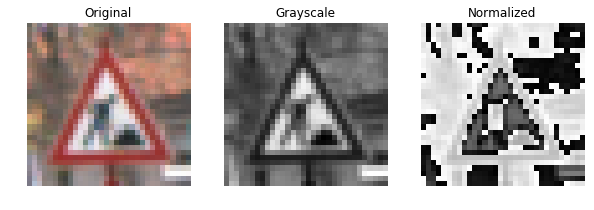

In [243]:
print("Original shape:", X_train.shape)
print("Grayscale shape:", X_train_gray.shape)
print("Normalized shape:", X_train_nor.shape)

fig, axs = plt.subplots(1,3, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('Original')
axs[0].imshow(X_train[1].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('Grayscale')
axs[1].imshow(X_train_gray[1].squeeze(), cmap='gray')

axs[2].axis('off')
axs[2].set_title('Normalized')
axs[2].imshow(X_train_nor[1].squeeze(), cmap='gray')

In [244]:
X_train = X_train_nor
X_test = X_test_nor
X_valid = X_valid_nor

### Model Architecture

#### Convolution and Max Pooling Layer and Flatten Layer
function conv2d_maxpool to apply convolution then max pooling

function flatten to apply flatten layer

function fully_conn to apply fully connected layer

In [159]:
import tensorflow as tf

def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # Arguments used for tf.truncated_normal, randomly defines variables 
    # for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    padding = 'VALID'
    
    # Set weights and bias
    weights=tf.Variable(tf.truncated_normal([conv_ksize[0],conv_ksize[1],x_tensor.shape[3].value,conv_num_outputs],mean=mu,stddev=sigma))
    #bias=tf.Variable(tf.zeros(conv_num_outputs))
    bias=tf.Variable(tf.constant([0.1]*conv_num_outputs))
    
    # Apply conv2d
    conv_x=tf.nn.conv2d(x_tensor,weights,strides=[1,conv_strides[0],conv_strides[1],1], padding=padding)
    conv_x=tf.nn.bias_add(conv_x,bias)
    conv_x=tf.nn.relu(conv_x)
    
    # Apply max pooling
    conv_max=tf.nn.max_pool(conv_x,ksize=[1,pool_ksize[0],pool_ksize[1],1],strides=[1,pool_strides[0],pool_strides[1],1],
                            padding=padding)
    
    return conv_max 

def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    return tf.contrib.layers.flatten(x_tensor)

def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(x_tensor,num_outputs)

def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    mu = 0
    sigma = 0.1
    # Weights and Bias
    weights_out=tf.Variable(tf.truncated_normal([x_tensor.shape[1].value, num_outputs],mean=mu,stddev=sigma))
    #bias_out=tf.Variable(tf.zeros(num_outputs))
    bias_out=tf.Variable(tf.constant([1.2]*num_outputs))
    out=tf.add(tf.matmul(x_tensor,weights_out),bias_out)
    return out

#### Convolutional Model

- 3 convolution and max pool layers
- 1 flatten layer
- 2 fully connected layer
- output layer

In [160]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def img_conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # Layer 1 from 32*32*1 to 28*28*8 to 14*14*6
    conv1=conv2d_maxpool(x_tensor=x,conv_num_outputs=6,
                         conv_ksize=(5,5),
                         conv_strides=(1,1),
                         pool_ksize=(2,2),
                         pool_strides=(2,2))
    
    # Layer 2 from 14*14*6 to 5*5*16
    conv2=conv2d_maxpool(x_tensor=conv1,conv_num_outputs=16,
                         conv_ksize=(5,5),
                         conv_strides=(1,1),
                         pool_ksize=(2,2),
                         pool_strides=(1,1))
    

    # Apply a Flatten Layer from 5*5*16 to 400
    conv_flat=flatten(conv2)
    
    # Two layers of fully connected layers 400 to 240 to 120
    fc1=fully_conn(conv_flat,300)
    fc1=tf.nn.dropout(fc1,keep_prob)
    
    fc2=fully_conn(fc1,300)
    fc2=tf.nn.dropout(fc2,keep_prob)
    
    # Apply an Output Layer    
    out=output(fc2, 43)
    
    return out

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = tf.placeholder(tf.float32,(None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y=tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [161]:
#################################
#### Build the Neural Network####
#################################

# Learning rate
rate=0.0005

# Model
logits = img_conv_net(x, keep_prob)

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y))
optimizer = tf.train.AdamOptimizer(learning_rate=rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32), name='accuracy')
saver = tf.train.Saver()

#### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [162]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        valid_acc=sess.run(accuracy,feed_dict={x: batch_x, y: batch_y, keep_prob:1.})
        total_accuracy += (valid_acc * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Train the Model

#### Single Optimization

Implement the function train_neural_network to do a single optimization. Idea from the Udacity Deep Learning Fundation Project 2.

In [146]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # Implement Function
    session.run(optimizer,feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob:keep_probability})

#### Hyperparameters

In [163]:
epochs = 30
batch_size = 128
keep_probability = 0.7

#### Fully Train the Model

Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [164]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for epoch in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            train_neural_network(sess, optimizer, keep_probability, batch_x, batch_y)
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(epoch+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.291

EPOCH 2 ...
Validation Accuracy = 0.532

EPOCH 3 ...
Validation Accuracy = 0.672

EPOCH 4 ...
Validation Accuracy = 0.717

EPOCH 5 ...
Validation Accuracy = 0.765

EPOCH 6 ...
Validation Accuracy = 0.786

EPOCH 7 ...
Validation Accuracy = 0.804

EPOCH 8 ...
Validation Accuracy = 0.810

EPOCH 9 ...
Validation Accuracy = 0.811

EPOCH 10 ...
Validation Accuracy = 0.822

EPOCH 11 ...
Validation Accuracy = 0.826

EPOCH 12 ...
Validation Accuracy = 0.829

EPOCH 13 ...
Validation Accuracy = 0.827

EPOCH 14 ...
Validation Accuracy = 0.847

EPOCH 15 ...
Validation Accuracy = 0.833

EPOCH 16 ...
Validation Accuracy = 0.848

EPOCH 17 ...
Validation Accuracy = 0.841

EPOCH 18 ...
Validation Accuracy = 0.843

EPOCH 19 ...
Validation Accuracy = 0.843

EPOCH 20 ...
Validation Accuracy = 0.846

EPOCH 21 ...
Validation Accuracy = 0.859

EPOCH 22 ...
Validation Accuracy = 0.852

EPOCH 23 ...
Validation Accuracy = 0.848

EPOCH 24 ...
Validation Accura

#### Model Accuracy

In [207]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))    
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Train Accuracy = 0.999
Valid Accuracy = 0.861
Test Accuracy = 0.836


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

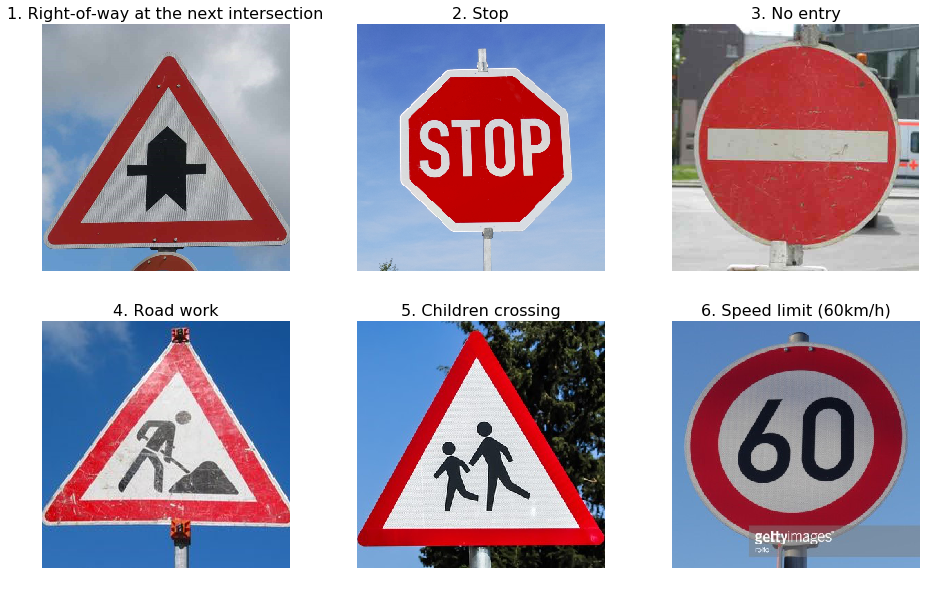

In [208]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import scipy.misc

my_images = sorted(glob.glob('./New-images/*.png'))
my_labels = np.array([12, 15, 18, 26, 29, 4])
my_labels = my_labels-1

plt.figure(figsize=(16, 10))
my_signs=[]

for i,img in enumerate(my_images):
    image=cv2.imread(img)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    my_signs.append(image)
    plt.subplot(2,3,i+1) 
    plt.imshow(image, cmap="gray") 
    plt.axis('off') 
    plt.title("{}. {}".format(i+1,labelnames[my_labels[i]]), fontsize=16)

Original Image shape (6, 32, 32, 3)
Normalized Image shape (6, 32, 32, 1)


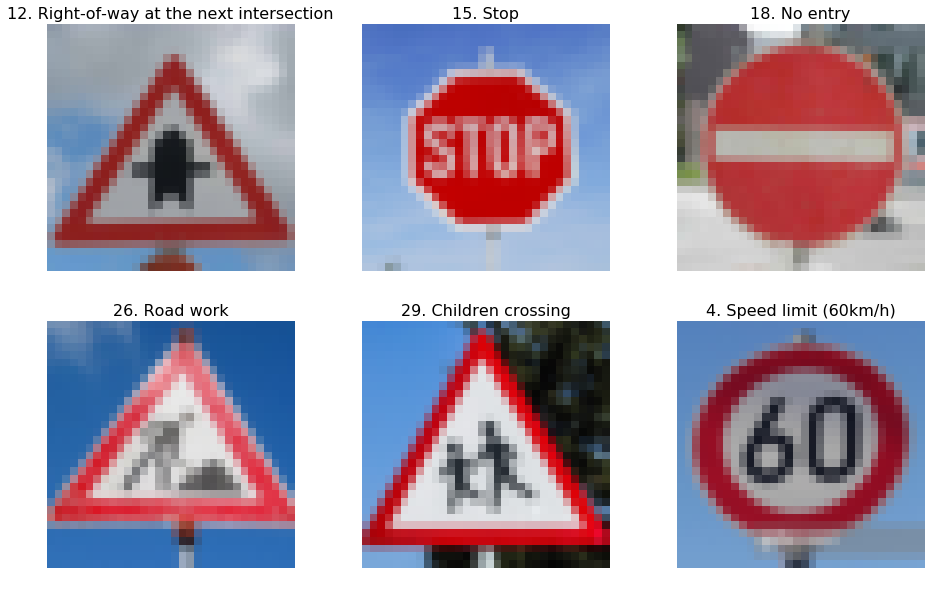

In [218]:
# Resizing images to 32*32
plt.figure(figsize=(16, 10))

my_signs_resize=[]

for i,img in enumerate(my_signs):
    image= scipy.misc.imresize((img), [32, 32])
    my_signs_resize.append(image)
    plt.subplot(2,3,i+1) 
    plt.imshow(image, cmap="gray") 
    plt.axis('off') 
    plt.title("{}. {}".format(my_labels[i]+1,labelnames[my_labels[i]]), fontsize=16)
        
my_signs_resize=np.asarray(my_signs_resize)
my_signs_gray=grayscale(my_signs_resize)
my_signs_nor=normalize(my_signs_gray)
print('Original Image shape',my_signs_resize.shape)
print('Normalized Image shape',my_signs_nor.shape)

### Predict the Sign Type for Each Image

In [226]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_logits_pred=sess.run(tf.argmax(logits,1), feed_dict={x: my_signs_nor, keep_prob:1.})
    
for i in range(len(my_labels)):
    print('Image {}'.format(i+1))
    print("Correct Sign Class:{} {}".format(my_labels[i]+1,labelnames[my_labels[i]]))
    print("Predicted Sign Class:{} {}".format(my_logits_pred[i]+1,labelnames[my_logits_pred[i]]))
    print()

INFO:tensorflow:Restoring parameters from .\lenet
Image 1
Correct Sign Class:12 Right-of-way at the next intersection
Predicted Sign Class:12 Right-of-way at the next intersection

Image 2
Correct Sign Class:15 Stop
Predicted Sign Class:15 Stop

Image 3
Correct Sign Class:18 No entry
Predicted Sign Class:18 No entry

Image 4
Correct Sign Class:26 Road work
Predicted Sign Class:26 Road work

Image 5
Correct Sign Class:29 Children crossing
Predicted Sign Class:12 Right-of-way at the next intersection

Image 6
Correct Sign Class:4 Speed limit (60km/h)
Predicted Sign Class:4 Speed limit (60km/h)



**Note:** Image 5 was missclassfied, these two signs (12 and 29) looks similar.

### Analyze Performance

In [219]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_sign_acc = evaluate(my_signs_nor, my_labels)
    print("Test Set Accuracy = {:.3f}".format(new_sign_acc))

INFO:tensorflow:Restoring parameters from .\lenet
Test Set Accuracy = 0.833


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


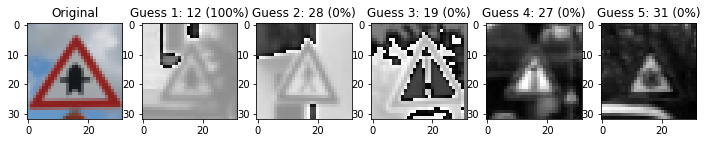

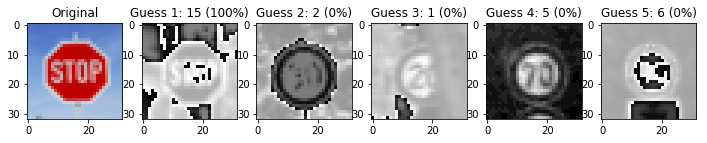

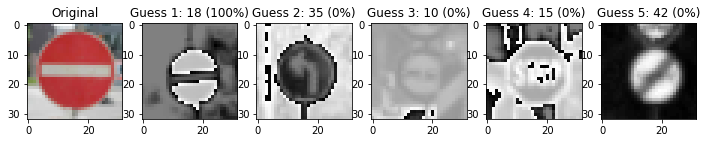

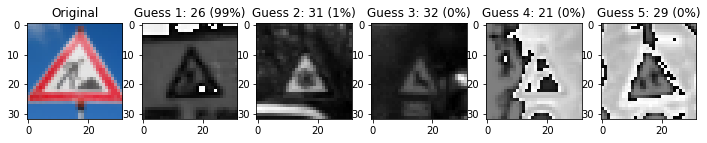

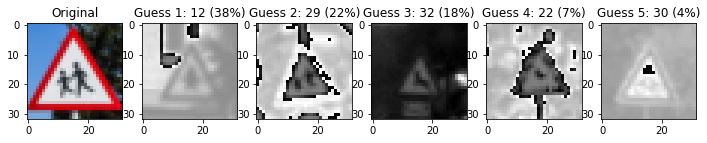

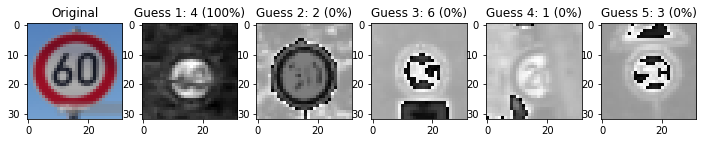

In [252]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_signs_nor, keep_prob: 1.})
    my_top_k = sess.run(top_k, feed_dict={x: my_signs_nor, keep_prob: 1.})

    for i in range(len(my_labels)):
        figures = {}
        labels = {}
        
        figures[0] = my_signs_resize[i]
        labels[0] = "Original"
        
        for j in range(k_size):
            labels[j+1] = 'Guess {}: {} ({:.0f}%)'.format(j+1, my_top_k[1][i][j]+1, 100*my_top_k[0][i][j])
            figures[j+1] = X_valid[np.argwhere(y_valid == my_top_k[1][i][j])[0]].squeeze()        
        
        fig, axs=plt.subplots(1,6,figsize=(12,14))
        axs=axs.ravel()
        for i,image in enumerate(figures):
            axs[i].imshow(figures[i])
            axs[i].set_title(labels[i])
        

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [256]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")